In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_excel('doctor_fee_train.xlsx')
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df_test=pd.read_excel('doctor_fee_test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
print('df train shape-->',df_train.shape)
print('df test shape-->',df_test.shape)

df train shape--> (5961, 7)
df test shape--> (1987, 6)


In [5]:
#Its generally a good idea to combine both train and test data sets into one, 
#perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train

In [6]:
df=df_train.append(df_test,ignore_index=True)
df.shape

(7948, 7)

In [7]:
#In testing data one column is less and that is Fees which is our target data

In [8]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [9]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 434.8+ KB


Finding:

1. Note that the Fees is the target variable and missing values are ones in the test set.
2. Only fees is float value, all others are string and if need to be converted later when cleaning one by one variable.
3. Missing value present Rating,Place and Miscellaneous_Info

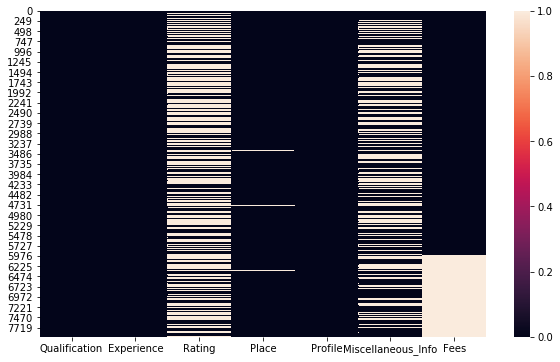

In [11]:
#checking for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

Finding:

1. Lots of null value present in Rating and Miscellaneous_Info.
2. Fees is the target variable and missing values are ones in the test set.
3. lots of row null value so not drop any row and cleaning the data one by one.

In [13]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [14]:
col=df.columns
for i in col:
    print(i)
    print(df[i].value_counts())
    print('--------------------------------------')

    

Qualification
BDS                                                                                           632
BHMS                                                                                          627
BAMS                                                                                          624
MBBS                                                                                          441
MBBS, MS - ENT                                                                                280
                                                                                             ... 
MD - Anaesthesiology, Diploma in Anesthesiology, MBBS                                           1
BAMS, BAMS, MD - Ayurveda Medicine, Fellow of Academy of General Education (FAGE)               1
MBBS, DNB - General Surgery, MCh - Plastic Surgery, DAFPRS Fellowship in Aesthetic Surgery      1
MBBS, MS - General Surgery, MCh - Oncology, MNAMS - General Surgery                             1
MBBS, 

In [15]:
#EDA for univariate analysis
#ratings
df['Rating'].value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
90%      95
92%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
73%      13
76%      13
60%      11
75%       8
70%       8
74%       7
78%       7
69%       6
68%       5
56%       5
55%       5
64%       4
72%       3
57%       3
33%       2
63%       2
65%       2
62%       2
53%       2
45%       1
40%       1
7%        1
52%       1
48%       1
36%       1
47%       1
58%       1
Name: Rating, dtype: int64

In [16]:
df['Rating'] = df['Rating'].str.split('%').str[0].astype(float)
df['Rating'].mean()

94.59251968503936

findings: mean rating is 94.59%

In [17]:
a = int(df['Rating'].mean())
df['Rating'].fillna(a, inplace=True)
df['Rating'] = df['Rating'].astype(int)

In [18]:
#experience
df['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
60 years experience      1
66 years experience      1
64 years experience      1
61 years experience      1
58 years experience      1
Name: Experience, Length: 64, dtype: int64

In [19]:
df['Experience'] = df['Experience'].str.split(' ').str[0].astype(int)
df['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [20]:
#Miscellaneous_Info
df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [21]:
df['Miscellaneous']=df['Miscellaneous_Info'].str.split('%', 1).str[1].str.strip()
df['Miscellaneous'].unique()

array(['16 Feedback Kakkanad, Ernakulam',
       '76 Feedback Whitefield, Bangalore', nan, ...,
       '36 Feedback Moti Nagar, Hyderabad',
       '20 Feedback Miyapur, Hyderabad',
       '240 Feedback Velachery, Chennai'], dtype=object)

In [22]:
df['Feedback'] = df['Miscellaneous'].str.extract('(\d+)')
df['Feedback'].unique()

array(['16', '76', nan, '4', '14', '8', '7', '46', '6', '60', '18', '2',
       '3', '21', '42', '65', '54', '43', '24', '44', '9', '47', '33',
       '51', '23', '30', '13', '84', '15', '55', '112', '20', '1', '5',
       '17', '67', '48', '11', '12', '40', '39', '57', '68', '175', '28',
       '34', '29', '19', '10', '506', '62', '38', '116', '53', '99',
       '566', '31', '72', '49', '50', '126', '22', '92', '59', '78',
       '493', '147', '101', '444', '1061', '282', '213', '82', '181',
       '187', '36', '71', '131', '159', '32', '141', '91', '153', '150',
       '88', '83', '26', '80', '27', '45', '35', '560', '188', '94', '64',
       '41', '37', '246', '109', '135', '52', '08', '118', '547', '203',
       '372', '435', '108', '56', '66', '102', '63', '210', '180', '61',
       '120', '128', '98', '854', '105', '96', '89', '25', '86', '74',
       '130', '148', '332', '97', '185', '154', '343', '192', '152', '87',
       '178', '309', '103', '243', '155', '238', '79', '388', 

In [23]:
# Since Feedback and Rating is missng values, we can assume that their corresonding Feedback is 0.
for i in df[(df['Feedback'].isna())].index:
    df['Feedback'][i] = 0

In [24]:
a = df['Feedback'].astype(float).mean()
df['Feedback'].fillna(a, inplace=True)
df['Feedback'] = df['Feedback'].astype(int)

In [25]:
#place
df['Place'].value_counts()

Andheri West, Mumbai        97
HSR Layout, Bangalore       97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
KH Road, Bangalore           1
Khajaguda, Hyderabad         1
Rohini Sector 11, Delhi      1
Madhavaram, Chennai          1
Gandhi Nagar, Chennai        1
Name: Place, Length: 948, dtype: int64

In [26]:
df['Area'] = df['Place'].str.split(', ').str[0].str.strip()
df['City'] = df['Place'].str.split(', ').str[1].str.strip()
df['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1601
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Sector 5                 1
Name: City, dtype: int64

In [27]:
#we drop null values in area
df.drop(index=(df[df['Area'].isna()].index), axis=0, inplace=True)

In [28]:
#profile
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [29]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1342
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [30]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Miscellaneous,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,"16 Feedback Kakkanad, Ernakulam",16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,"76 Feedback Whitefield, Bangalore",76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,NaN,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,NaN,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,"4 Feedback Keelkattalai, Chennai",4,Keelkattalai,Chennai


In [31]:
#Drop unwanted coulumns
df.drop(columns=['Miscellaneous_Info', 'Place', 'Miscellaneous'], axis=1, inplace=True)
df.shape

(7917, 8)

In [32]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100.0,16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350.0,76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300.0,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250.0,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250.0,4,Keelkattalai,Chennai


In [33]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Profile             0
Fees             1981
Feedback            0
Area                0
City                1
dtype: int64

In [34]:
df[df['City'].isna()]

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
3980,BDS,23,94,Dentist,250.0,0,e,NaN


In [35]:
#drop city null value row is 3980
df.drop(index=(df[df['City'].isna()].index), axis=0, inplace=True)

In [36]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Profile             0
Fees             1981
Feedback            0
Area                0
City                0
dtype: int64

In [37]:
#checking for correlation
df.corr()

,Experience,Rating,Fees,Feedback
Experience,1.000000,-0.173713,-0.004672,0.008678
Rating,-0.173713,1.000000,-0.080387,0.064651
Fees,-0.004672,-0.080387,1.000000,0.076419
Feedback,0.008678,0.064651,0.076419,1.000000


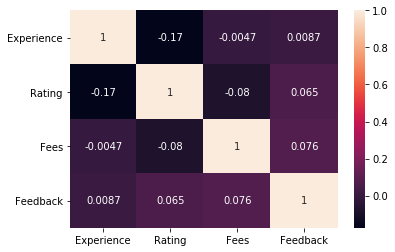

In [38]:
sns.heatmap(df.corr(),annot=True)

Observation:

1. Feedback is postive correlated with all numerical features.
2. fees is only positive correlated with Feedback.

In [39]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print(' Total Number of variables :', df.shape[1])
print(' Number of Categorical variable :', len(cat_df))
print(' Number of Numerical variable :', len(num_df))

 Total Number of variables : 8
 Number of Categorical variable : 4
 Number of Numerical variable : 4


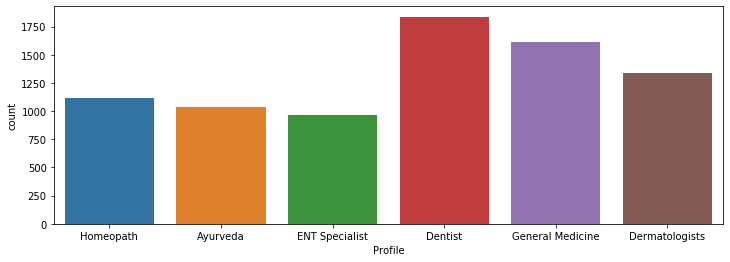

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(df['Profile'])

finding: most of the doctores are dentist

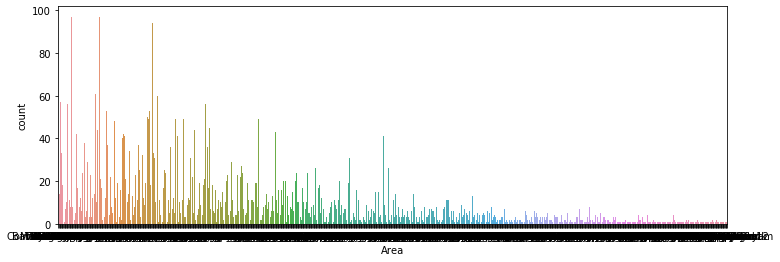

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(df['Area'])

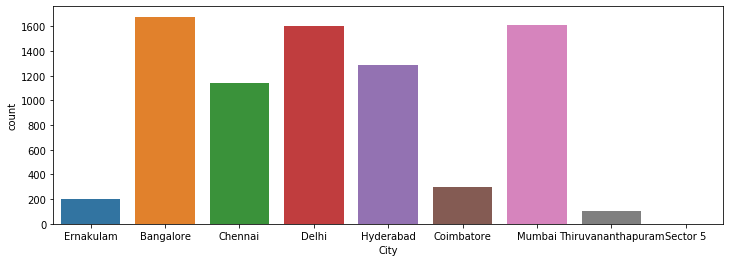

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(df['City'])

findings: most of the doctore from banglore, delhi, mumbai

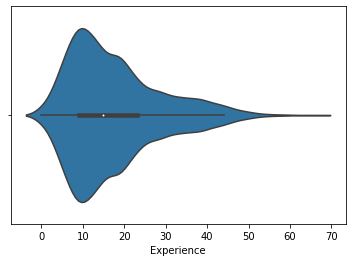

In [43]:
sns.violinplot(df['Experience'])

findings: most of the doctore have 8-20 years of experience

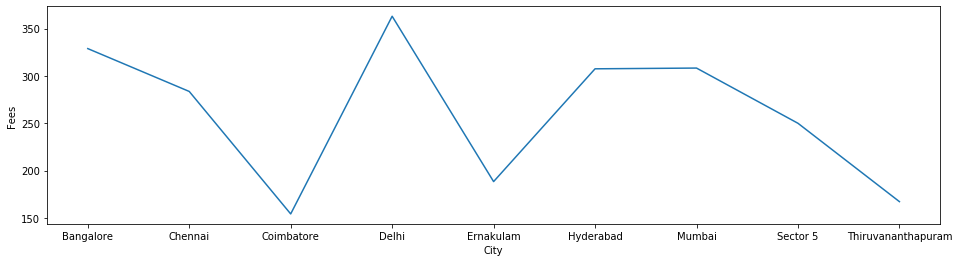

In [44]:
#bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='City', y='Fees', data=df, ci=None)

max fees in delhi city

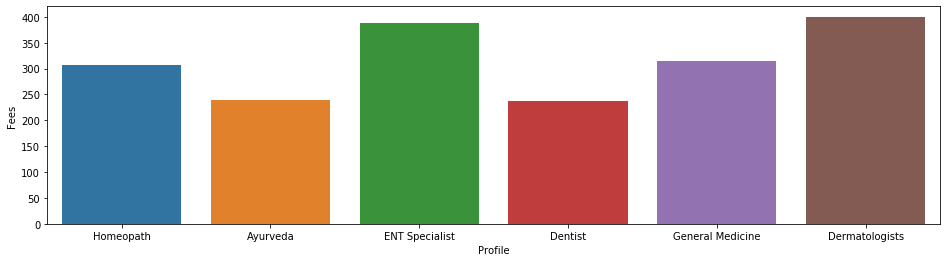

In [45]:
plt.figure(figsize=(16,4))
sns.barplot(x='Profile', y='Fees', data=df, ci=None)

dermatologists and ent specialist have max fees 

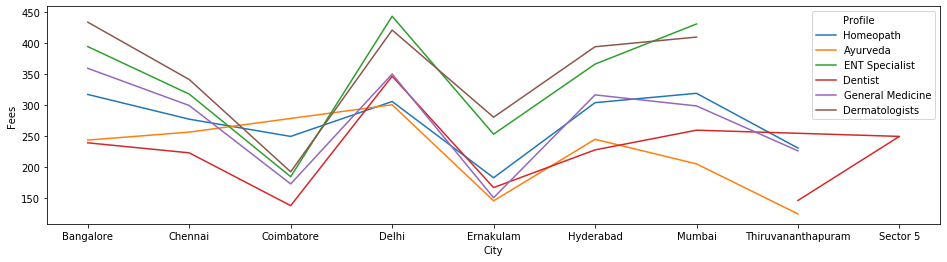

In [46]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City', y='Fees', hue='Profile', data=df, ci=None)

findings:
    
    max fees in profile
    homeopath-banglore an mumbai
    ayurveda-delhi
    ent-delhi, mumbai, bangalore
    dentist-delhi
    general medicine-delhi, bangalore
    dermatologists-delhi, mumbai, bangalore

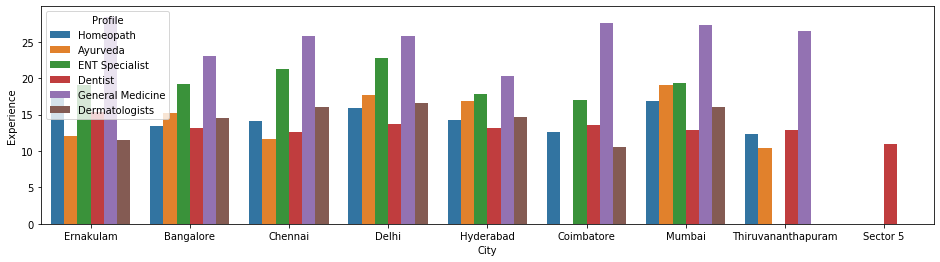

In [47]:
plt.figure(figsize=(16,4))
sns.barplot(x='City', y='Experience', hue='Profile', data=df, ci=None)

findings:
    
    1)general medicine has max experience in all city except sector 5
    2)dentist has less experience in all city
    

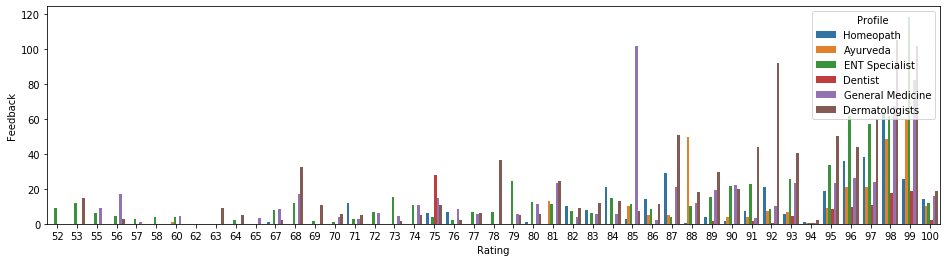

In [48]:
df1 = df[df['Rating'] > 50]
plt.figure(figsize=(16,4))
sns.barplot(x='Rating', y='Feedback', hue='Profile', data=df1, ci=None)

1)ENT specialist has max number of gooodfeedback
2)general medicine has max number of feedback in 85 favour 

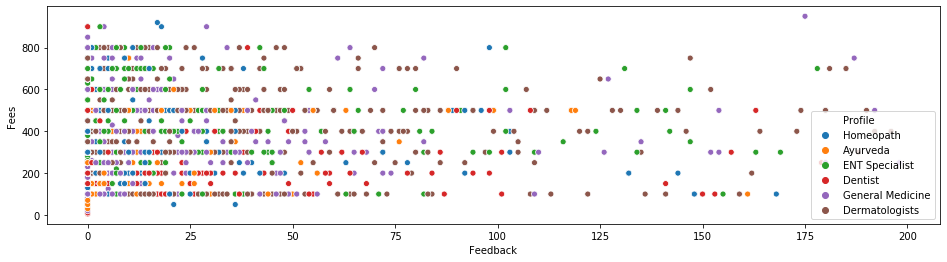

In [49]:
df1 = df[df['Feedback'] < 200]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Feedback', y='Fees', hue='Profile', data=df1, ci=None)

In [50]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100.0,16,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350.0,76,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,94,ENT Specialist,300.0,0,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,94,Ayurveda,250.0,0,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250.0,4,Keelkattalai,Chennai


In [51]:
#We will convert all categorical variables into numeric types using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


col=['Qualification','Profile','Area','City']
for i in col:
    df[i]=le.fit_transform(df[i])

In [52]:
df[df['Fees'].isna()].shape

(1981, 8)

In [53]:
df.shape[0]

7916

In [54]:
df.index = range(0,7916)
df[df['Fees'].isna()].head()

,Qualification,Experience,Rating,Profile,Fees,Feedback,Area,City
5935,748,35,94,4,NaN,0,217,6
5936,982,31,94,3,NaN,0,923,5
5937,788,40,70,2,NaN,4,314,1
5938,16,0,94,0,NaN,0,573,3
5939,255,16,100,1,NaN,0,340,0


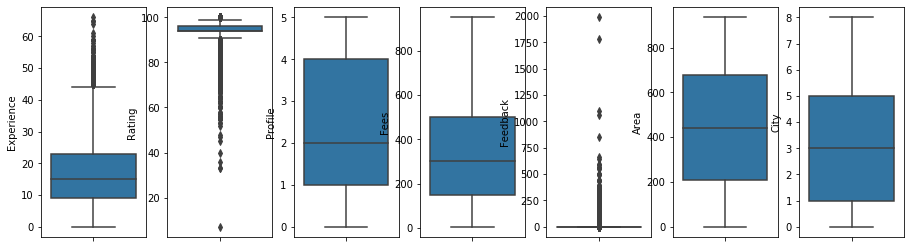

In [55]:
#cheking for outliers:


collist=df.columns.values
plt.figure(figsize=(20,50))
for i in range(1,len(collist)):
    plt.subplot(10,9,i+1)
    sns.boxplot(df[collist[i]],orient='v')
    plt.tight_layout

outliers are present in maximum number od rows so we take dataset as it is

In [56]:
df.skew()

Qualification     0.246950
Experience        0.993018
Rating           -4.429609
Profile           0.085252
Fees              0.747349
Feedback         16.977373
Area              0.101948
City              0.042167
dtype: float64

In [57]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [58]:
#Again check skewness
df.skew()

Qualification    0.246950
Experience       0.141165
Rating          -6.978736
Profile          0.085252
Fees             0.239165
Feedback         3.820025
Area             0.101948
City             0.042167
dtype: float64

In [59]:
#Splitting x and y
df_train = df[0:5935]
df_test = df[5935:].drop(columns=['Fees'], axis=1)
x = df_train.drop(columns=['Fees'], axis=1)
y = df_train['Fees']

In [61]:
# Instantiate and scale the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [62]:
# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (4748, 7) | x_test.shape --> (1187, 7) 
y_train.shape --> (4748,) | y_test.shape --> (1187,)


In [63]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score


In [64]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [65]:
# Instantiate all models without using gridsearch cv for best parameters means call all model with deafault parameters
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [66]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf,
            'Gradient Boosting Regression': gbr,
            'AdaBoost Regression': abr
           }

In [67]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------', i, '------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------- Linear Regression ------------
Accuracy Score :: 9.38
R2 Score: 0.0733761767784411
>>> Error >>>
Mean Absolute Error: 4.317563521480039
Mean Squared Error: 27.225485057741476
Root Mean Squared Error: 5.217804620502906
------------- K-Neighbors Regressor ------------
Accuracy Score :: 36.09
R2 Score: 0.0469514747970885
>>> Error >>>
Mean Absolute Error: 4.168784399645002
Mean Squared Error: 28.00187922214725
Root Mean Squared Error: 5.291680188952016
------------- Ridge Regression ------------
Accuracy Score :: 9.38
R2 Score: 0.07338188119132483
>>> Error >>>
Mean Absolute Error: 4.317582319397435
Mean Squared Error: 27.22531745422877
Root Mean Squared Error: 5.217788559747201
------------- Lasso Regression ------------
Accuracy Score :: 3.81
R2 Score: 0.028478719148796294
>>> Error >>>
Mean Absolute Error: 4.509272883537326
Mean Squared Error: 28.544634243412915
Root Mean Squared Error: 5.342717870467513
------------- Elastic Net ------------
Accuracy Score :: 5.31
R2 Sco

In [68]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,RMSE
6,Decision Tree Regression,99.8064,6.96087
7,Random Forest Regressor,88.5615,4.91615
1,K-Neighbors Regressor,36.0919,5.29168
8,Gradient Boosting Regression,28.3562,4.82556
5,Support Vector Regression,17.1579,5.06062
9,AdaBoost Regression,16.2161,5.06449
0,Linear Regression,9.37797,5.2178
2,Ridge Regression,9.37797,5.21779
4,Elastic Net,5.30659,5.3034
3,Lasso Regression,3.81242,5.34272


In [69]:
cv_scores = cross_val_score(dct, x_train, y_train, cv=10)
cv_scores.mean()*100

-52.3485171066526

In [70]:
#save best model
# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(dct,'DTR_Doctor_Consultation_Fee.pkl')

['DTR_Doctor_Consultation_Fee.pkl']